<a href="https://colab.research.google.com/github/0ROHAN0/CMPE255_HW/blob/main/HW2_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 1 Part 3: Preprocessing the BayWheels Bike Dataset

The original dataset is available here: https://s3.amazonaws.com/baywheels-data/index.html
You will each work on a subset of the dataset as follows:

Take the last two digits of your SJSU ID. Pick the month corresponding to the last digit of your SJSU ID. For example, if your SJSU ID ends in 7, you will pick July. If the digit in the tens place is even, pick the dataset for the year 2020. If it is odd, pick the dataset for the year 2021. 

For example, if your SJSU ID is 123456789, the last digit of your SJSU ID is 9 and the digit in the tens place is even. So, you will pick the dataset for September 2020, i.e., 202009-baywheels-tripdata.csv.zip. If your SJSU ID is 098765432, the last digit of your SJSU ID is 2 and the digit in the tens place is odd. So, you will pick the dataset for February 2021, i.e., 202102-baywheels-tripdata.csv.zip. If the last digit of your SJSU ID is 0, pick the dataset for October. This will be the same dataset as your chosen dataset for HW1 Part 3.

Perform the following tasks on the provided dataset. High pass and low pass specifications are on Canvas. Please note that ALL questions labelled [LP] must be completed satisfactorily to receive a low pass on the assignment. The [HP] question specifications combine all parts of the homework. Please refer to Canvas for more details.

Note that if you are unable to complete any of the LP questions satisfactorily, you will receive a grade of "revision required". You can revise and resubmit your work in exchange for a token. Please review the syllabus for more information on specifications grading.

**VERY IMPORTANT**: Include **ALL** the references you used for this assignment, including names of classmates you discuss with. Failure to cite your sources counts as an act of academic dishonesty and will be taken seriously without zero tolerance. You will automatically receive a “fail” grade in the homework and further serious penalties may be imposed.

NOTE: You can look for help on the Internet but refrain from referencing too much. Please cite all your sources in your submission. 
When you submit your assignment, you automatically agree to the following statement. If you do not agree, it is your responsibility to provide the reason.

“*I affirm that I have neither given nor received unauthorized help in completing this homework. I am not aware of others receiving such help. I have cited all the sources in the solution file.*”

My sjsu Id 016672682 has 2 at the end of it. Thus I am picking Febuary dataset of Febuary 2021.

In [1]:
## Your code goes here. Import the csv into a pandas dataframe here
import pandas as pd
import numpy as np
df = pd.read_csv("/content/202102-baywheels-tripdata.csv", na_values="?")
df.keys()
df.head()
# df.isna().sum()
# df.describe()
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,371D557F2479F774,electric_bike,2021-02-12 12:16:25,2021-02-12 12:17:01,NaN,NaN,NaN,NaN,37.780000,-122.420000,37.78,-122.42,casual
1,317BB9662DEA824B,electric_bike,2021-02-28 17:27:12,2021-02-28 17:45:50,NaN,NaN,NaN,NaN,37.770000,-122.430000,37.80,-122.42,casual
2,609E6F07AB922AA2,electric_bike,2021-02-28 18:09:53,2021-02-28 18:28:04,NaN,NaN,NaN,NaN,37.740000,-122.420000,37.79,-122.43,casual
3,D65E1D0040D6B087,electric_bike,2021-02-28 18:29:57,2021-02-28 18:35:25,NaN,NaN,NaN,NaN,37.770000,-122.500000,37.77,-122.50,casual
4,319D9916F6F8128F,electric_bike,2021-02-28 18:07:04,2021-02-28 18:23:07,NaN,NaN,NaN,NaN,37.780000,-122.510000,37.77,-122.49,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31336,5934D7E2C1767AFC,electric_bike,2021-02-01 08:17:59,2021-02-01 09:09:55,Folsom St at 9th St,SF-K25,NaN,NaN,37.773517,-122.411908,37.76,-122.48,casual
31337,8649205338FF1B83,electric_bike,2021-02-08 10:56:28,2021-02-08 11:06:17,Market St at Franklin St,SF-K22-1,NaN,NaN,37.773908,-122.421084,37.75,-122.41,casual
31338,43E30949040C23DA,electric_bike,2021-02-27 12:47:27,2021-02-27 13:07:12,7th Ave at Irving St,SF-M12,NaN,NaN,37.763587,-122.464104,37.77,-122.49,casual
31339,0A987BF19C1E0C0C,electric_bike,2021-02-07 23:17:15,2021-02-07 23:18:24,Park Ave at Race St,SJ-M5,NaN,NaN,37.326027,-121.912421,37.33,-121.91,casual


[HP] Extract ridership data grouped by the start location of the ride. You may use start station names or the start station location information. Extract the total number of rides starting at the location. Suggested steps are as follows:

1. Group the columns by the start location such that the final set of columns are as follows:
*   Locations from which rides started
*   Total Rides starting at that location
*   Average duration of each ride. You may need to extract this information. Sample code to extract this information from start and end times for the rides is provided below.
You may need to use the [groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) function on pandas. 

Explain the steps you used to extract the data

2. Plot the number of rides on a map using the start location's latitude and longitude information. This should depict areas of the city from which most rides are picked up. Explain the insights you can draw from the plot. 

3. Cluster the locations into an appropriate number of clusters using the number of rides and the average ride duration as features. Note that you may need to scale the data. Plot the results and discuss your findings briefly. 

< Your answer for HP goes here >

In [ ]:
#Sample code to show timedelta usage
import pandas as pd

t1 = pd.to_datetime("11/01/2022  10:59:25 AM")
t2 = pd.to_datetime("11/01/2022  11:15:03 AM")
td = (t2 - t1)
td.total_seconds()

938.0

In [ ]:
## Your code for HP goes here. 
def Atime(a,b):
  t1 = pd.to_datetime(a)
  t2 = pd.to_datetime(b)
  td = (t2 - t1)
  one = td.total_seconds()
  two = (one/60)
  return(round(two,2))    # Returning average time in minutes.

Average_time = []

for i in range(0,111073):
  j = Atime(df.started_at[i], df.ended_at[i])
  Average_time.append(j)

df['Average Duration'] = Average_time
df

# print(Average_time)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Average Duration
0,371D557F2479F774,electric_bike,2021-02-12 12:16:25,2021-02-12 12:17:01,NaN,NaN,NaN,NaN,37.780000,-122.420000,37.780000,-122.420000,casual,0.60
1,317BB9662DEA824B,electric_bike,2021-02-28 17:27:12,2021-02-28 17:45:50,NaN,NaN,NaN,NaN,37.770000,-122.430000,37.800000,-122.420000,casual,18.63
2,609E6F07AB922AA2,electric_bike,2021-02-28 18:09:53,2021-02-28 18:28:04,NaN,NaN,NaN,NaN,37.740000,-122.420000,37.790000,-122.430000,casual,18.18
3,D65E1D0040D6B087,electric_bike,2021-02-28 18:29:57,2021-02-28 18:35:25,NaN,NaN,NaN,NaN,37.770000,-122.500000,37.770000,-122.500000,casual,5.47
4,319D9916F6F8128F,electric_bike,2021-02-28 18:07:04,2021-02-28 18:23:07,NaN,NaN,NaN,NaN,37.780000,-122.510000,37.770000,-122.490000,casual,16.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111068,6CC0C441607E4BAB,classic_bike,2021-02-18 06:02:39,2021-02-18 06:22:48,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771951,-122.453705,37.763708,-122.415204,member,20.15
111069,ECC333B00108B2EB,classic_bike,2021-02-27 06:25:11,2021-02-27 06:40:34,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771951,-122.453705,37.763708,-122.415204,member,15.38
111070,63971FE6AFC02507,classic_bike,2021-02-25 06:25:20,2021-02-25 06:41:34,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771951,-122.453705,37.763708,-122.415204,member,16.23
111071,D343E2081AB58E27,classic_bike,2021-02-28 06:13:37,2021-02-28 06:31:12,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771951,-122.453705,37.763708,-122.415204,member,17.58


In [ ]:
total_locations = df.groupby(['start_station_name']).start_station_name.unique().count()
total_rides = df.groupby(['start_station_name'])['ride_id'].count()


df.groupby(['start_station_name', 'start_station_id'])['ride_id'].count()
demo = df.groupby(['start_station_name'])['Average Duration'].sum()
print("Total starting locations are = {}\n\n**************************************************\n\n The number of rides as per each ride starting location is as under: \n\n{}\n\n**************************************************\n\n The answer of HW is as under: \n {}".format(total_locations, demo, total_rides))


Total starting locations are = 457

**************************************************

 The number of rides as per each ride starting location is as under: 

start_station_name
10th Ave at E 15th St                                      314.23
10th Ave at Irving St                                    11922.67
10th St at Empire St                                       512.09
10th St at Fallon St                                      7497.53
10th St at University Ave                                  542.51
                                                           ...   
Williams Ave at Apollo St                                  206.77
Willow St at Blewett Ave                                  1993.89
Willow St at Vine St                                       373.26
Woolsey St at Sacramento St                               1403.68
Yerba Buena Center for the Arts (Howard St at 3rd St)     5552.35
Name: Average Duration, Length: 457, dtype: float64

*******************************************

Explaination:


*   firstly I did count average time taken in minutes for each ride and added the data in a new column
*   Then by using 'groupby()' I found the data related to each ride starting location


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# lat_s = df.groupby(['start_station_name'])['start_lat'].sum()
# lng_s = df.groupby(['start_station_name'])['start_lng'].sum()

sample = df.groupby(['start_station_name', 'start_lat', 'start_lng'])['start_lat', 'start_lng', 'ride_id'].count()
One = df.groupby(['start_station_name'])['start_lat'].unique()
print(type(One[0][0]), One[0][0].astype('float64'))

sample_1 = df.groupby(['start_lat', 'start_lng'])['ride_id'].count()
Sample = sample_1.to_frame()

a_Data = df.groupby([ 'start_lat', 'start_lng'])['start_lat'].unique()
b_Data = df.groupby([ 'start_lat', 'start_lng'])['start_lng'].unique()
# c_Data = df.groupby(['start_station_name'])['Average Duration'].sum()

a_data = a_Data.to_frame()
b_data = b_Data.to_frame()
# c_data = c_Data.to_frame()

k1 = []
k2 = []
k3 = []
# using K4 set in upcoming code.
# k5 = []


for i in range(0,51558):
  k1.append(a_data.iloc[i].astype('float64')[0])
  k2.append(b_data.iloc[i].astype('float64')[0])
  k3.append(Sample.ride_id.iloc[i])
  # k5.append(c_data.iloc[i])

print(type(sample), type(Sample))
print(a_data, b_data)

# plt.scatter(lat_s, lng_s, c = total_rides, cmap='viridis')


<ipython-input-6-47be01b5232d>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sample = df.groupby(['start_station_name', 'start_lat', 'start_lng'])['start_lat', 'start_lng', 'ride_id'].count()


<class 'numpy.float64'> 37.7927143
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
                                 start_lat
start_lat start_lng                       
37.270000 -121.880000              [37.27]
37.280000 -121.890000              [37.28]
          -121.830000              [37.28]
          -121.820000              [37.28]
37.290000 -121.930000              [37.29]
...                                    ...
37.876573 -122.269528  [37.87657254910685]
37.880222 -122.269592          [37.880222]
          -122.269592  [37.88022244590679]
38.050000 -122.190000              [38.05]
          -122.180000              [38.05]

[51558 rows x 1 columns]                                    start_lng
start_lat start_lng                         
37.270000 -121.880000              [-121.88]
37.280000 -121.890000              [-121.89]
          -121.830000              [-121.83]
          -121.820000              [-121.82]
37.290000 -121.930000             

In [ ]:
K1= pd.Series(k1)
K2= pd.Series(k2)
K3= pd.Series(k3)
print(type(K1), type(K2))


<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


<Axes: xlabel='start_lat,start_lng'>

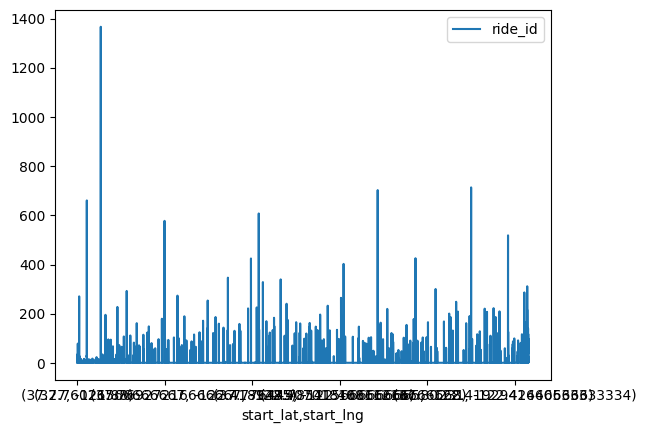

In [ ]:
Sample.plot()
# print(type(k1), type(k2), type(Sample.ride_id), Sample.ride_id)

In [ ]:
# # print(type(a_data.iloc[1].astype('int64')))
# # p = a_data.iloc[0].astype('float64')[0]
# # print(p)
# # to_numeric()
# print(type(a_data.start_lat.iloc[0].astype('float64')[0]))
# p = a_data.iloc[0].astype('float64')[0]
# print(p)


In [ ]:
# sns.barplot(x=k1, y=k2, hue=k3);
# # sns.barplot(x=K1, y=K2, hue=Sample['ride_id']);



KeyboardInterrupt: ignored

3> Cluster the locations into an appropriate number of clusters using the number of rides and the average ride duration as features. Note that you may need to scale the data. Plot the results and discuss your findings briefly.


=> Using K means clusteriung to find the appropriate nunmber of clusters based on starting locations.

In [ ]:
print("the number of rides par locations are as under:\n\n",total_rides,"\n\nThe average duration of total rides taken from each location is as under:\n\n",demo)


the number of rides par locations are as under:

 start_station_name
10th Ave at E 15th St                                     13
10th Ave at Irving St                                    395
10th St at Empire St                                      29
10th St at Fallon St                                      35
10th St at University Ave                                 26
                                                        ... 
Williams Ave at Apollo St                                 11
Willow St at Blewett Ave                                  35
Willow St at Vine St                                       6
Woolsey St at Sacramento St                               67
Yerba Buena Center for the Arts (Howard St at 3rd St)    229
Name: ride_id, Length: 457, dtype: int64 

The average duration of total rides taken from each location is as under:

 start_station_name
10th Ave at E 15th St                                      314.23
10th Ave at Irving St                                   

In [ ]:
k4 = []
k5 = []
k6 = []

c_Data = df.groupby(['start_station_name'])['Average Duration'].sum()
d_Data = df.groupby(['start_station_name'])['start_station_name'].unique()
for i in range(0,457):
  temp1 = total_rides.iloc[i]
  temp2 = c_Data.iloc[i]
  temp3 = d_Data[i].astype(str)
  k4.append(temp1)
  k5.append(temp2)
  k6.append(temp3)

K4 = pd.Series(k4)
K5 = pd.Series(k5)
K6 = pd.Series(k6)

print(type(K4),"ok:",k4[0], type(K5), type(d_Data.astype(str)[0]), E1)


<class 'pandas.core.series.Series'> ok: 13 <class 'pandas.core.series.Series'> <class 'str'> ['10th Ave at E 15th St']


In [ ]:
data = {
    # 'locations': K6,
    'Num_rides': K4,
    'Time': K5
    }

df_sample = pd.DataFrame(data)
print(df_sample)

     Num_rides      Time
0           13    314.23
1          395  11922.67
2           29    512.09
3           35   7497.53
4           26    542.51
..         ...       ...
452         11    206.77
453         35   1993.89
454          6    373.26
455         67   1403.68
456        229   5552.35

[457 rows x 2 columns]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df_sample.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['Num_rides', 'Time'])

print("Scaled Dataset Using MinMaxScaler")
df_scaled


Scaled Dataset Using MinMaxScaler


,Num_rides,Time
0,0.009029,0.007341
1,0.296464,0.295180
2,0.021068,0.012248
3,0.025583,0.185456
4,0.018811,0.013002
...,...,...
452,0.007524,0.004677
453,0.025583,0.048990
454,0.003762,0.008805
455,0.049661,0.034355


In [ ]:
df_scaled['Locations'] = K6
df_scaled

,Num_rides,Time,Locations
0,0.009029,0.007341,[10th Ave at E 15th St]
1,0.296464,0.295180,[10th Ave at Irving St]
2,0.021068,0.012248,[10th St at Empire St]
3,0.025583,0.185456,[10th St at Fallon St]
4,0.018811,0.013002,[10th St at University Ave]
...,...,...,...
452,0.007524,0.004677,[Williams Ave at Apollo St]
453,0.025583,0.048990,[Willow St at Blewett Ave]
454,0.003762,0.008805,[Willow St at Vine St]
455,0.049661,0.034355,[Woolsey St at Sacramento St]


# References
Include ALL your references here. 

# What to turn in:
1. The ipynb solution file, which includes the references
2. If you use Colab or GitHub for version control, please share a link to your notebook or GitHub repository